## Parte 3: Scale free graph
In questa sezione andiamo ad analizzare una scale free network generato tramite networkx, in particolare attraverso il modello Barabasi-Albert. Per cui il nostro esponente γ sarà uguale a 3.

Come prima il numero di nodi rimane inviariato, e ciascuno di esso è collegato rispettivamente con due nodi, preferibilmente con alta degree.

In [1]:
import networkx
graph = networkx.barabasi_albert_graph(150,2, seed=42)


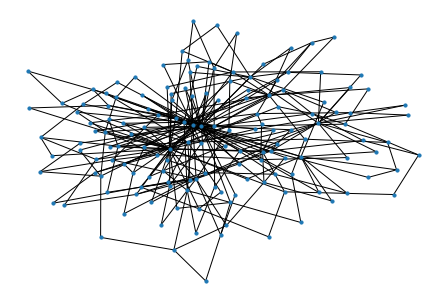

In [2]:
import matplotlib.pyplot as plt

networkx.draw(graph, with_labels=False, node_size=10)
plt.show()

In [3]:
print("Number of nodes: ", len(graph))
print("Number of edges: ", graph.number_of_edges())

Number of nodes:  150
Number of edges:  296


In [4]:
import collections

def average_degree(graph):
    """
    Calculate the average degree of the network
    :param graph: the networkx Graph() object
    :return: the average degree of the network
    """
    k = map(lambda d: d[1], graph.degree())
    return sum(list(k)) / graph.number_of_nodes()

print("Avarage degree: ", average_degree(graph))

Avarage degree:  3.9466666666666668


Text(0.5, 0, 'Degree')

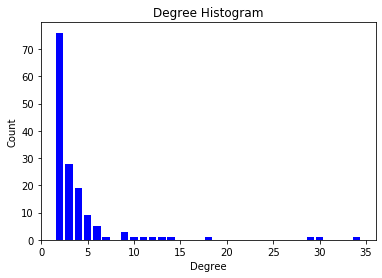

In [5]:
# Plot istrogramma degree

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")



In [6]:
print("Density: ", networkx.density(graph))


Density:  0.026487695749440716


In [7]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)

components = sorted(connected_component_subgraphs(graph), key=len, reverse=True)
print("There are ", len(components), " connected components")
print("Giant component size: ", len(components[0]))



There are  1  connected components
Giant component size:  150


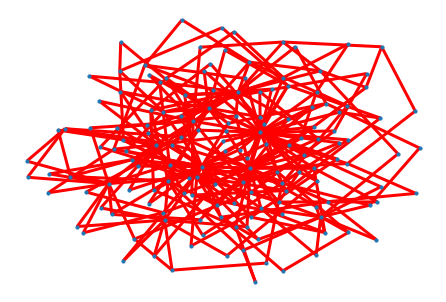

In [8]:
# Plot del grafo con le varie componenti connesse colorate con diversi colori
# identify largest connected component
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



pos = graphviz_layout(graph)

networkx.draw(graph, pos, with_labels=False, node_size=10)
# Getting largest connected component
graphcc = sorted(networkx.connected_components(graph), key=len, reverse=True)
graph0 = graph.subgraph(graphcc[0])
networkx.draw_networkx_edges(graph0, pos,
                        with_labels=False,
                        edge_color='r',
                        width=3.0
                        )
# show other connected components
for Gi in graphcc[1:]:
    if len(Gi) > 1:
        networkx.draw_networkx_edges(graph.subgraph(Gi), pos,
                                with_labels=False,
                                edge_color='r',
                                alpha=0.3,
                                width=2.0
                                )



Nelle celle seguenti andiamo quindi a misurare la distanza massima (diametro), minima (raggio) e media tra due punti qualsiasi del grafo.  
<br>In realtà non è possibile trovare queste misure per tutto il grafo se non è completamente connesso perché la il diametro e la media sarebbero uguali ad infinito.

In [9]:
print("Maximum eccentricity of giant component: ", networkx.diameter(components[0])) 

Maximum eccentricity of giant component:  6


In [10]:
print("Minimun eccentricity of giant component: ", networkx.radius(components[0])) 

Minimun eccentricity of giant component:  3


In [11]:
print("Average shortes path: ", networkx.average_shortest_path_length(components[0]))

Average shortes path:  3.1323489932885904


Adesso andiamo ad analizzare il clustering coefficient e la transitivity che ci da un'idea di quanto i nodi siano connessi tra di loro e la percentuale di cliques all'interno del grafo.

In [12]:
print("Average clustering coefficient: ", networkx.average_clustering(graph))

Average clustering coefficient:  0.09180801769037063


In [13]:
print("Transitivity: ", networkx.transitivity(graph))

Transitivity:  0.03905614320585842


### Considerazioni

Come si può vedere dall'istrogramma del grado dei vari nodi, abbiamo la media degree media pari a 3.9, ma sono presenti degli hub con degree maggiore a 30! Questi sono i nostri hubs, i nodi che andranno poi attaccati nel secondo assignment per far crollare la rete. 

#### Nodi importanti

In questa sezione si andrà ad analizzare quale nodi sono più importanti di altri, in base a metriche descritte in precedenza.

Questi nodi saranno poi target di attacchi per il 2nd assignment.

In [14]:
print("10 nodi con degree maggiore")
dict(sorted(graph.degree, key=lambda x: x[1], reverse=True)[:10])

10 nodi con degree maggiore


{2: 34, 4: 30, 1: 29, 0: 18, 5: 14, 3: 13, 24: 12, 8: 11, 49: 10, 17: 9}

In [15]:
import operator

print("10 nodi con maggiore closeness")
dict(sorted(networkx.closeness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore closeness


{2: 0.49337748344370863,
 1: 0.4837662337662338,
 4: 0.476038338658147,
 5: 0.415041782729805,
 0: 0.41046831955922863,
 3: 0.3962765957446808,
 8: 0.3850129198966408,
 16: 0.3850129198966408,
 17: 0.38303341902313626,
 19: 0.38107416879795397}

In [16]:
print("10 nodi con maggiore betweenness")
dict(sorted(networkx.betweenness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore betweenness


{2: 0.3205816343372213,
 4: 0.25595365666142317,
 1: 0.24614226092091887,
 0: 0.10213925428840956,
 5: 0.09695801611748044,
 3: 0.07769367754114362,
 24: 0.06594293637623737,
 8: 0.06008829850731735,
 17: 0.05014184224864904,
 27: 0.04842447606359394}

In [17]:
print("10 nodi con maggiore clustering coefficient")
dict(sorted(networkx.clustering(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore clustering coefficient


{28: 1.0,
 46: 1.0,
 51: 1.0,
 63: 1.0,
 73: 1.0,
 103: 1.0,
 109: 1.0,
 122: 1.0,
 143: 1.0,
 64: 0.6666666666666666}